In [1]:
#import libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re as re


In [2]:
#changing working directory to tatinic
os.chdir('C:\\Users\\elorm\\Desktop\\Data_Science\\Kaggle_Projects\\titanic')
os.getcwd()

'C:\\Users\\elorm\\Desktop\\Data_Science\\Kaggle_Projects\\titanic'

In [3]:
#import data#
dtrain=pd.read_csv('C:\\Users\\elorm\\Desktop\\Data_Science\\Kaggle_Projects\\titanic\\train.csv')
dtest=pd.read_csv('C:\\Users\\elorm\\Desktop\\Data_Science\\Kaggle_Projects\\titanic\\test.csv')
gender=pd.read_csv('C:\\Users\\elorm\\Desktop\\Data_Science\\Kaggle_Projects\\titanic\\gender_submission.csv')
m_data=[dtrain,dtest]
dtest.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
print(dtrain.columns)
print(dtrain.info())
print(dtrain.isnull().sum()) #null values
dtrain.head(5)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
## Feature Engineering and exploratory data analysis
#Pclass
dtrain['Pclass'].isnull()
print(dtrain[['Pclass','Survived']].groupby(['Pclass'],as_index=False).mean())

   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363


      Sex  Survived
0  female  0.742038
1    male  0.188908


male      577
female    314
Name: Sex, dtype: int64

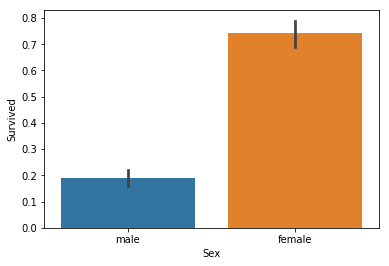

In [6]:
#Sex
dtrain['Sex'].isnull()
print(dtrain[['Sex','Survived']].groupby(['Sex'],as_index=False).mean())
sns.barplot(x=dtrain['Sex'],y=dtrain['Survived'])
dtrain.Sex.value_counts()

   F_size  Survived
0       1  0.303538
1       2  0.552795
2       3  0.578431
3       4  0.724138
4       5  0.200000
5       6  0.136364
6       7  0.333333
7       8  0.000000
8      11  0.000000


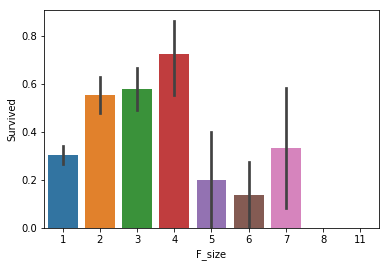

In [7]:
#SibSp and Parch
for dataset in m_data:
    dataset['F_size']=dataset['SibSp']+dataset['Parch']+1
print(dtrain[['F_size','Survived']].groupby(['F_size'],as_index=False).mean())
sns.barplot(x=dtrain['F_size'],y=dtrain['Survived'])

   Alone  Survived
0      0  0.505650
1      1  0.303538


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,F_size,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,1


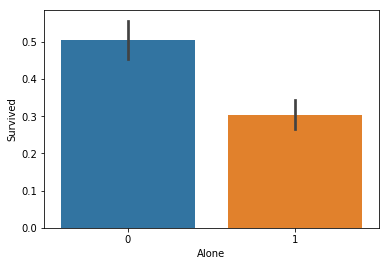

In [8]:
for dataset in m_data:
    dataset['Alone']=0
    dataset.loc[dataset['F_size']==1,'Alone']=1
print(dtrain[['Alone','Survived']].groupby(['Alone'],as_index=False).mean())
sns.barplot(x=dtrain.Alone,y=dtrain.Survived)
dtrain.head(5)

  Embarked  Survived
0        C  0.553571
1        Q  0.389610
2        S  0.339009


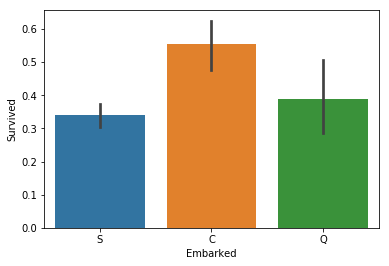

In [9]:
#embarked
#filling embarked with most frequent class s
for dataset in m_data:
    dataset['Embarked']=dataset['Embarked'].fillna('S')
print(dtrain[['Embarked','Survived']].groupby(['Embarked'],as_index=False).mean())
sns.barplot(x=dtrain['Embarked'],y=dtrain['Survived'])

   CategoricalFare  Survived
0   (-0.001, 7.91]  0.197309
1   (7.91, 14.454]  0.303571
2   (14.454, 31.0]  0.454955
3  (31.0, 512.329]  0.581081


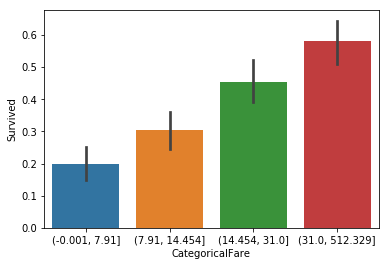

In [10]:
#Fare
#filling missing values with 
#dtrain['Fare'].describe()
#dtest['Fare'].describe()
#dtrain['Fare'].isnull()
dtest['Fare'].fillna(dtest['Fare'].median(),inplace=True)
dtrain['CategoricalFare']=pd.qcut(dtrain['Fare'],4)
print(dtrain[['CategoricalFare','Survived']].groupby(['CategoricalFare'],as_index=False).mean())
sns.barplot(x=dtrain['CategoricalFare'],y=dtrain['Survived'])

In [11]:
#Name
def g_title(name):
    title_search=re.search('([A-Za-z]+)\.',name)
    if title_search:
        return title_search.group(1)
    return ""

for dataset in m_data:
    dataset['Title']=dataset['Name'].apply(g_title)
print(pd.crosstab(dtrain['Title'],dtrain['Sex']))
print(pd.crosstab(dtest['Title'],dtest['Sex']))

Sex       female  male
Title                 
Capt           0     1
Col            0     2
Countess       1     0
Don            0     1
Dr             1     6
Jonkheer       0     1
Lady           1     0
Major          0     2
Master         0    40
Miss         182     0
Mlle           2     0
Mme            1     0
Mr             0   517
Mrs          125     0
Ms             1     0
Rev            0     6
Sir            0     1
Sex     female  male
Title               
Col          0     2
Dona         1     0
Dr           0     1
Master       0    21
Miss        78     0
Mr           0   240
Mrs         72     0
Ms           1     0
Rev          0     2


    Title  Survived
0  Master  0.575000
1    Miss  0.700535
2      Mr  0.164486
3     Mrs  0.775194


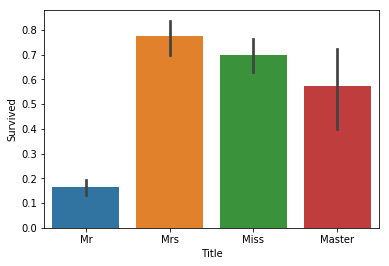

In [12]:
for dataset in m_data:
    dataset['Title']=dataset['Title'].replace(['Lady','Dona','Capt','Col','Countess','Don','Dr','Jonkheer','Major','Rev','Sir'])
    dataset['Title']=dataset['Title'].replace('Mlle','Miss')
    dataset['Title']=dataset['Title'].replace('Ms','Miss')
    dataset['Title']=dataset['Title'].replace('Mme','Mrs')
print(dtrain[['Title','Survived']].groupby(['Title'],as_index=False).mean())
sns.barplot(x=dtrain['Title'],y=dtrain['Survived'])

In [13]:
# Age
dtrain['Age'].isnull()
for dataset in m_data:
    age_avg=dataset['Age'].mean()
    age_std=dataset['Age'].std()
    age_null_count=dataset['Age'].isnull().sum()
    age_null_random_list=np.random.randint(age_avg-age_std,age_avg + age_std,size=age_null_count)
    dataset['Age'][np.isnan(dataset['Age'])]=age_null_random_list
    dataset['Age']=dataset['Age'].astype(int)
dtrain['CategoricalAge']=pd.cut(dtrain['Age'],5)
print(dtrain[['CategoricalAge','Survived']].groupby(['CategoricalAge'],as_index=False).mean())

  CategoricalAge  Survived
0  (-0.08, 16.0]  0.513274
1   (16.0, 32.0]  0.349666
2   (32.0, 48.0]  0.385542
3   (48.0, 64.0]  0.434783
4   (64.0, 80.0]  0.090909


C:\Users\elorm\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [14]:
for dataset in m_data:
    dataset.loc[dataset['Fare']<=7.91,'Fare']=0
    dataset.loc[(dataset['Fare']>7.91) & (dataset['Fare']<=14.454),'Fare']=1
    dataset.loc[(dataset['Fare']>14.454) & (dataset['Fare']<=31),'Fare']=2
    dataset.loc[dataset['Fare']>31,'Fare']=3
    
    dataset.loc[dataset['Age']<=16,'Age']=0
    dataset.loc[(dataset['Age']>16) & (dataset['Age']<=32),'Age']=1
    dataset.loc[(dataset['Age']>32) & (dataset['Age']<=48),'Age']=2
    dataset.loc[(dataset['Age']>48) & (dataset['Age']<=64),'Age']=3
    dataset.loc[(dataset['Age']>64) ,'Age']=4
dtrain.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,F_size,Alone,CategoricalFare,Title,CategoricalAge
0,1,0,3,"Braund, Mr. Owen Harris",male,1,1,0,A/5 21171,0.0,NaN,S,2,0,"(-0.001, 7.91]",Mr,"(16.0, 32.0]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,2,1,0,PC 17599,3.0,C85,C,2,0,"(31.0, 512.329]",Mrs,"(32.0, 48.0]"
2,3,1,3,"Heikkinen, Miss. Laina",female,1,0,0,STON/O2. 3101282,1.0,NaN,S,1,1,"(7.91, 14.454]",Miss,"(16.0, 32.0]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,2,1,0,113803,3.0,C123,S,2,0,"(31.0, 512.329]",Mrs,"(32.0, 48.0]"
4,5,0,3,"Allen, Mr. William Henry",male,2,0,0,373450,1.0,NaN,S,1,1,"(7.91, 14.454]",Mr,"(32.0, 48.0]"


In [15]:
dtrain.columns
drop_elements=['Name','SibSp', 'Parch', 'Ticket','F_size','Cabin']
dtrain=dtrain.drop(drop_elements,axis=1)
dtrain=dtrain.drop(['CategoricalAge','CategoricalFare'],axis=1)
dtest=dtest.drop(drop_elements,axis=1)

In [16]:
dtrain.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Sex             object
Age              int32
Fare           float64
Embarked        object
Alone            int64
Title           object
dtype: object

In [17]:
#encode categorical variables
s=dtrain.dtypes=='object'
object_cols=list(s[s].index)
print(object_cols)


['Sex', 'Embarked', 'Title']


In [18]:
#making copies of original data
from sklearn.preprocessing import LabelEncoder
dtrain_label=dtrain.copy()
dtest_label=dtest.copy()
#apply label encoder
label_encoder=LabelEncoder()
for col in object_cols:
    dtrain_label[col]=label_encoder.fit_transform(dtrain[col])
    dtest_label[col]=label_encoder.transform(dtest[col])

In [19]:
dtrain_label['Fare']=dtrain_label['Fare'].astype(int)
dtest_label['Fare']=dtest_label['Fare'].astype(int)

In [20]:
dtrain_label.dtypes
dtrain_label.head
dtrain_label.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Embarked',
       'Alone', 'Title'],
      dtype='object')

In [21]:
#import libraries for classifiers

from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score,log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression

features=['Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'Alone','Title']
X=dtrain_label[features]
y=dtrain_label['Survived']
X_test=dtest_label[features]

In [22]:
X_test.shape

(418, 7)

In [24]:
model=SVC()
model.fit(X,y)
pred=model.predict(X_test)
print(pred)

[0 1 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 0 1 0 1 1 0 1 0 1 0 0 0 0 0 1 1 0 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 1 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 1 0
 1 0 0 1 0 1 1 0 0 0 0 0 1 1 1 1 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 1 1 0 1 1 1 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 0 0 1 0 1 1 0 1 1 1 1 1 0 0 1 0 1 0 0 0 0 1 1 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 1 0 0 0 1 0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 1 0 1 1 0 1 1 0 0 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 1 1 1 0 1 0 0 1]


C:\Users\elorm\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [27]:
output = pd.DataFrame({'PassengerId': dtest_label['PassengerId'],'Survived': pred})
output.to_csv('submission.csv', index=False)

In [ ]:


""" 
classifiers=[KNeighborsClassifier(3), SVC(probability=True),DecisionTreeClassifier(),RandomForestClassifier(),
            AdaBoostClassifier(),GradientBoostingClassifier(),GaussianNB(),LinearDiscriminantAnalysis(),
             QuadraticDiscriminantAnalysis(),LogisticRegression()]

log_cols=["Classifier","Accuracy"]
log=pd.DataFrame(columns=log_cols)
sss=StratifiedShuffleSplit(n_splits=10,test_size=0.1,random_state=0)

X=dtrain_label.iloc[:,1:7]
y=dtrain_label.iloc[:,0]
print(X)
print(y)
accuracy_dict={}
for train_index,test_index in sss.split(X,y):
    X_train,X_test=X[train_index],X[test_index]
    y_train,y_test=y[train_index],y[test_index]


for clf in classifiers:
    name=clf.___class__.__name__
    clf.fit(X_train,y_train)
    t_pred=clf.predict(X_test)
    acc=accuracy_score(y_test,t_pred)
    if name in accuracy_dict:
        accuracy_dict[name]+=acc
    else:
        accuracy_dict[name]=acc  

for clf in accuracy_dict:
    accuracy_dict[clf]=acc_dict[clf]/10.0
    log_entry=pd.DataFrame([[clf,accuracy_dict[clf]]],columns=log_cols)
    log=log.append(log_entry)

    
plt.xlabel('Accuracy')
plt.title('Classifier Accuracy')
sns.set_color_codes("muted")
sns.barplot(x='Accuracy',y='Classifier',data=log,color="r")"""